<a href="https://colab.research.google.com/github/hamagami/anomaly-detection/blob/main/AnoGan_withcont.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AnoGan
https://arxiv.org/abs/1703.05921
original code by https://github.com/yjucho1/anoGAN

実行には多くの時間がかかるので，予め学習された結果について確認をしてください。

In [1]:
!wget https://raw.githubusercontent.com/yjucho1/anoGAN/master/anogan.py

--2020-12-12 15:30:27--  https://raw.githubusercontent.com/yjucho1/anoGAN/master/anogan.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4340 (4.2K) [text/plain]
Saving to: ‘anogan.py’

anogan.py           100%[===================>]   4.24K  --.-KB/s    in 0s      

2020-12-12 15:30:27 (66.7 MB/s) - ‘anogan.py’ saved [4340/4340]



In [2]:
!wget https://dl.dropbox.com/s/ybmcc7speexqy7l/assets.zip
!unzip -d . assets.zip

--2020-12-12 15:30:27--  https://dl.dropbox.com/s/ybmcc7speexqy7l/assets.zip
Resolving dl.dropbox.com (dl.dropbox.com)... 162.125.6.15, 2620:100:6019:15::a27d:40f
Connecting to dl.dropbox.com (dl.dropbox.com)|162.125.6.15|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/s/ybmcc7speexqy7l/assets.zip [following]
--2020-12-12 15:30:28--  https://dl.dropboxusercontent.com/s/ybmcc7speexqy7l/assets.zip
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.6.15, 2620:100:6019:15::a27d:40f
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.6.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4484408 (4.3M) [application/zip]
Saving to: ‘assets.zip’

assets.zip          100%[===================>]   4.28M  --.-KB/s    in 0.02s   

2020-12-12 15:30:30 (179 MB/s) - ‘assets.zip’ saved [4484408/4484408]

Archive:  assets.zip
  inflating: ./assets/anoGAN.png     
  in

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tqdm import tqdm
import anogan

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype(np.float32)/255.
X_train = X_train.reshape(60000, 28, 28, 1)


Model_d, Model_g = anogan.train(32, X_train)

11493376/11490434 [==============================] - 0s 0us/step


  0%|          | 0/200 [00:00<?, ?it/s]

#### discriminator ######
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (

100%|██████████| 200/200 [4:24:42<00:00, 79.41s/it]


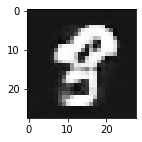

In [4]:
## generate random image 

generated_img = anogan.generate(3)
plt.figure(figsize=(2, 2))
plt.imshow(generated_img[0].reshape(28, 28),cmap=plt.cm.gray)
plt.show()

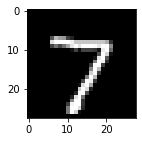

anomaly score : 3567.5703125


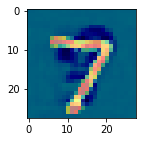

In [5]:
## compute anomaly score - sample from test set

X_test = X_test.astype(np.float32)/255.
X_test = X_test.reshape(-1, 28, 28, 1)
test_img = X_test[0]

model = anogan.anomaly_detector()
ano_score, similar_img = anogan.compute_anomaly_score(model, test_img.reshape(1, 28, 28, 1))

plt.figure(figsize=(2, 2))
plt.imshow(test_img.reshape(28,28), cmap=plt.cm.gray)
plt.show()
print("anomaly score : " + str(ano_score))
plt.figure(figsize=(2, 2))
plt.imshow(test_img.reshape(28,28), cmap=plt.cm.gray)
residual  = test_img.reshape(28,28) - similar_img.reshape(28, 28)
plt.imshow(residual, cmap='jet', alpha=.5)
plt.show()

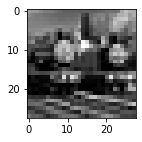

anomaly score : 2981.868408203125


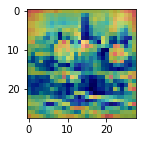

In [6]:
## compute anomaly score - sample from strange image

test_img = plt.imread('assets/test_img.png')
test_img = test_img[:,:,0]

model = anogan.anomaly_detector()
ano_score, similar_img = anogan.compute_anomaly_score(model, test_img.reshape(1, 28, 28, 1))

plt.figure(figsize=(2, 2))
plt.imshow(test_img.reshape(28,28), cmap=plt.cm.gray)
plt.show()
print("anomaly score : " + str(ano_score))
plt.figure(figsize=(2, 2))
plt.imshow(test_img.reshape(28,28), cmap=plt.cm.gray)
residual  = test_img.reshape(28,28) - similar_img.reshape(28, 28)
plt.imshow(residual, cmap='jet', alpha=.5)
plt.show()


a sample from generated anomaly images(random noise image)


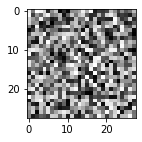

10/10 [==============================] - 0s 4ms/step


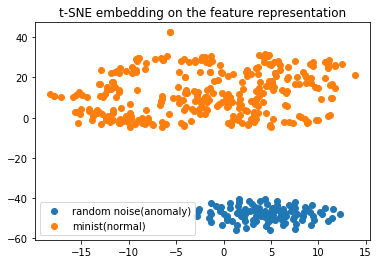

In [7]:
from sklearn.manifold import TSNE

## t-SNE embedding 

# generating anomaly image for test (radom noise image)

random_image = np.random.uniform(0,1, (100, 28,28, 1))
print("a sample from generated anomaly images(random noise image)")
plt.figure(figsize=(2, 2))
plt.imshow(random_image[0].reshape(28,28), cmap=plt.cm.gray)
plt.show()

# intermidieate output of discriminator
model = anogan.feature_extractor()
feature_map_of_random = model.predict(random_image, verbose=1)
feature_map_of_minist = model.predict(X_test[:300], verbose=1)

# t-SNE for visulization
output = np.concatenate((feature_map_of_random, feature_map_of_minist))
output = output.reshape(output.shape[0], -1)
anomaly_flag = np.array([1]*100+ [0]*300)

X_embedded = TSNE(n_components=2).fit_transform(output)
plt.title("t-SNE embedding on the feature representation")
plt.scatter(X_embedded[:100,0], X_embedded[:100,1], label='random noise(anomaly)')
plt.scatter(X_embedded[100:,0], X_embedded[100:,1], label='minist(normal)')
plt.legend()
plt.show()